In [1]:
import requests
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates
import numpy as np
import csv
import hashlib
from cryptography.fernet import Fernet
import json
import base64
import urllib3
urllib3.disable_warnings()

URL = 'http://api.utt.phec.net'

In [7]:

req = requests.get(URL + '/storage')
req.status_code


200

### Recupération des données

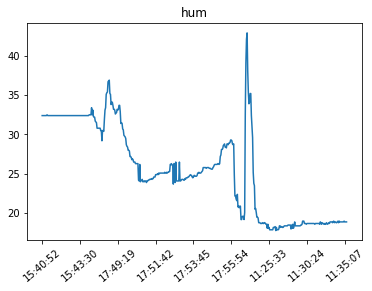

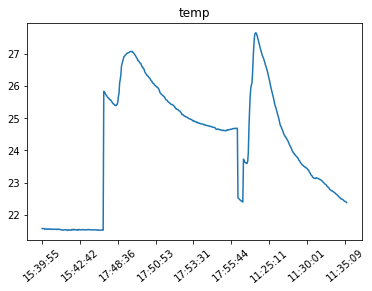

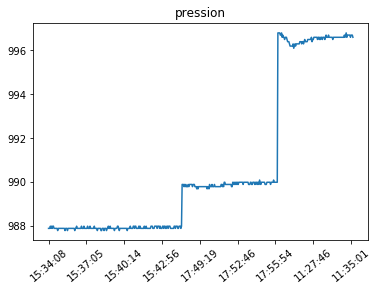

In [8]:
req = requests.get(URL + '/storage')
for cap in req.json():
    X = [datetime.datetime.fromtimestamp(float(val['t'])).time().isoformat() for val in req.json()[cap]]
    Y = [float(val['v']) for val in req.json()[cap]]
    plt.plot(X,Y)
    interv = int(len(X)/8)
    X_ticks = [X[i*interv] for i in range(9)]
    plt.xticks(X_ticks, rotation = 40)
    plt.title(cap)
    plt.show()

## Ecriture des donnés dans un fichier .CSV
Le nom du fichier est créé à partir du timestamp de début et de fin 

In [5]:
deb_temp = req.json()['temp'][0]['t']
fin_temp = req.json()['temp'][-1]['t']
with open(f'{deb_temp}_{fin_temp}_temp.csv', mode = 'w') as f:
    f_writer = csv.writer(f)
    for point in req.json()['temp']:
        f_writer.writerow([point['t'], point['v']])
        
        
deb_hum = req.json()['hum'][0]['t']
fin_hum = req.json()['hum'][-1]['t']       

with open(f'{deb_hum}_{fin_hum}_hum.csv', mode = 'w') as f:
    f_writer = csv.writer(f)
    for point in req.json()['hum']:
        f_writer.writerow([point['t'], point['v']])
        
deb_pression = req.json()['pression'][0]['t']
fin_pression = req.json()['pression'][-1]['t']
with open(f'{deb_pression}_{fin_pression}_pression.csv', mode = 'w') as f:
    f_writer = csv.writer(f)
    for point in req.json()['pression']:
        f_writer.writerow([point['t'], point['v']])
           



## Fonction de hashage d'un fichier

In [ ]:
def get_digest(file_path):
    h = hashlib.sha256()
    with open(file_path, 'rb') as file:
        while True:
            # Reading is buffered, so we can read smaller chunks.
            chunk = file.read(h.block_size)
            if not chunk:
                break
            h.update(chunk)

    return h.hexdigest()


## On hashe les trois fichiers

In [ ]:
h_temp = get_digest(f'{deb_temp}_{fin_temp}_temp.csv')
print('h_temp: ', h_temp)
h_hum = get_digest(f'{deb_hum}_{fin_hum}_hum.csv')
print('h_hum: ', h_hum)
h_pression = get_digest(f'{deb_pression}_{fin_pression}_pression.csv')
print('h_pression: ', h_pression)

## Préparation des données à envoyer en blockchain

In [ ]:

datas = [
    {'name' : f'{deb_temp}_{fin_temp}_temp.csv','hash': f'{h_temp}'},
    {'name' : f'{deb_hum}_{fin_hum}_hum.csv','hash': f'{h_hum}'},
    {'name' : f'{deb_pression}_{fin_pression}_pression.csv','hash': f'{h_pression}'}
    ]

datas


## envoie des données en Blockchain

In [ ]:
r = requests.post(URL + '/blockchain', json=datas)

In [ ]:
r.json()

In [ ]:
BC_URL = f'https://ropsten.etherscan.io/tx/{r.json()}'
print(BC_URL)